In [14]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

In [3]:
source = datasets.load_digits()
data = source.data
target = source.target

(1797, 64)
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on p

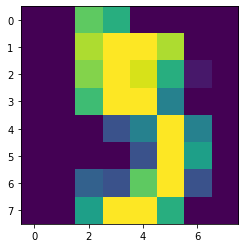

In [12]:
print(data.shape)
print(target)
print(source.DESCR)
plt.imshow(data[5].reshape(8,8))

In [25]:
data = source.data
target = source.target

features = 64
classes = 10

design1 = data
design1 = np.c_[np.ones(len(target)), design1]
onehot = (np.arange(classes) == target[:, None])

learning_rate = 10**(-4)
no_steps = 10**3
params = np.zeros((features + 1,classes))
stopping_cond = 10**(-3)
loss_vec =[]

def activity( design1, params ):
    activation = design1 @ params
    return np.exp(activation) / np.sum(np.exp(activation), 1, keepdims = True)

def loss_fun( design1, params, onehot ):
    log = (-np.log(activity( design1, params )))
    return np.sum( log * onehot )

for epoch in range(no_steps):
    loss = loss_fun( design1, params, onehot )
    loss_vec = np.append(loss_vec, loss)
    grad = - design1.T @ ( onehot - activity( design1, params ) ) 
    params -= learning_rate * grad
    if(epoch > 2 and abs(loss_vec[-2]-loss_vec[-1]) < stopping_cond):
        break
    print(epoch, loss)

0 4137.7454121103
1 649.7969263193856
2 12075.460247977808
3 70934.74638089178
4 113185.8113661922
5 147726.24472165364
6 124791.24901414849
7 120991.23501404378
8 95682.53428322515
9 77140.97009934545
10 90179.61212248368
11 65123.17523276029
12 32889.29790993297
13 15180.826275341557
14 16698.458256594196
15 3401.9373175930305
16 2645.9726312361345
17 2512.196438196269
18 3949.500546066195
19 3605.1172806790673
20 8041.15917435967
21 4115.020901972827
22 3304.147577752889
23 1871.9906042764503
24 1535.3952520999023
25 1000.1689638767054
26 885.0677857878229
27 817.3453896181366
28 776.7515504217159
29 737.7513349985036
30 706.7782576648973
31 679.1026731641755
32 654.8675915159988
33 633.183498320411
34 613.7383346184059
35 595.971450598031
36 579.64562674109
37 564.4731024173183
38 550.315365546003
39 537.0230773234957
40 524.4862627701074
41 512.5998471616621
42 501.2838181415865
43 490.4790893434941
44 480.1429759269711
45 470.24682421908847
46 460.76505429584455
47 451.6788266082

474 11.75348587076531
475 11.696341472029879
476 11.639870159125532
477 11.584061821625667
478 11.528906416326588
479 11.474393975879712
480 11.42051461664996
481 11.367258545833266
482 11.31461606786777
483 11.26257759017319
484 11.211133628255293
485 11.16027481021116
486 11.109991880670867
487 11.060275704211804
488 11.011117268279895
489 10.962507685651406
490 10.914438196468698
491 10.86690016988074
492 10.819885105319154
493 10.773384633438031
494 10.727390516745128
495 10.681894649950866
496 10.636889060058415
497 10.592365906219076
498 10.548317479373633
499 10.504736201700867
500 10.461614625890714
501 10.418945434261355
502 10.376721437734943
503 10.334935574688402
504 10.293580909692349
505 10.252650632152084
506 10.21213805486158
507 10.172036612482383
508 10.132339859956998
509 10.09304147086618
510 10.054135235739032
511 10.015615060322865
512 9.977474963821079
513 9.939709077104292
514 9.902311640901761
515 9.865277003977866
516 9.828599621298363
517 9.792274052191557
51

907 4.6005641042482885
908 4.595300465951926
909 4.590052241936514
910 4.58481936221874
911 4.579601757256112
912 4.574399357943412
913 4.569212095609106
914 4.564039902011831
915 4.558882709336936
916 4.553740450193035
917 4.548613057608565
918 4.543500465028407
919 4.538402606310579
920 4.533319415722879
921 4.528250827939621
922 4.5231967780383595
923 4.5181572014967415
924 4.513132034189223
925 4.508121212383964
926 4.503124672739748
927 4.4981423523028035
928 4.493174188503752
929 4.488220119154622
930 4.483280082445782
931 4.478354016943041
932 4.473441861584618
933 4.468543555678236
934 4.46365903889827
935 4.4587882512828765
936 4.453931133231071
937 4.44908762550004
938 4.444257669202274
939 4.439441205802814
940 4.434638177116563
941 4.4298485253055295
942 4.425072192876213
943 4.420309122676817
944 4.415559257894785
945 4.410822542054079
946 4.406098919012663
947 4.401388332959842
948 4.396690728413883
949 4.392006050219356
950 4.3873342435447595
951 4.382675253879973
952 4.

999 4.173122561833292


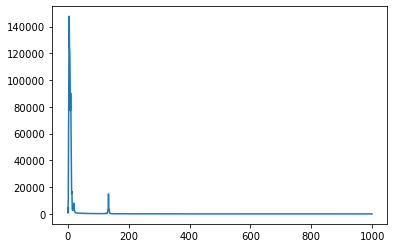

In [26]:
from matplotlib import pyplot as plt

print(epoch, loss)
plt.plot(range(len(loss_vec)), loss_vec)
plt.show()

In [24]:
value = np.argmax( activity(design1, params), 1)
hit = (value == target)
acc = np.mean(hit)
print(acc)

1.0
